# Central tendency

Pandas provide different methods to calculate the central tendency of a dataset. The most common are the mean, median, and mode. 

In [63]:
%%capture
# make sure the required packages are installed
%pip install pandas seaborn matplotlib

## Dataset

We will use the Titanic dataset, which contains information about the passengers of the Titanic. The dataset is available at the seaborn library.

In [64]:
# get the titanic dataset from seaborn
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
print(f"Shape of the dataset: {titanic_df.shape}.")
titanic_df.head(10)

Shape of the dataset: (891, 15).


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [65]:
# Let's add an outlier for the fare column
# we take the index with the greatest fare value
greatest_fare_index = titanic_df['fare'].idxmax()
# we set the fare value to 1M
previous_highest_fare = titanic_df.loc[greatest_fare_index, 'fare']
titanic_df.loc[greatest_fare_index, 'fare'] = 1_000_000  # outlier

## Mode

Mode can be computed for nominal variables. It is the value that appears most frequently in the dataset.

In [66]:
# compute the mode of the embark_town column
print(f"Mode of the embark_town column:\n{titanic_df['embark_town'].mode()}")
# mode returns a series, so we need to get the first element
print(f"Mode of the embark_town column: {titanic_df['embark_town'].mode()[0]}.")

Mode of the embark_town column:
0    Southampton
Name: embark_town, dtype: object
Mode of the embark_town column: Southampton.


In [67]:
# with enough data, it could make sense to compute the mode of a discrete numerical variable
# compute the mode of the age column
print(f"Mode of the age column: {(age_mode := titanic_df['age'].mode()[0])}.")
# filter the dataset with age equal to age_mode 
print(f"Number of occurrences of the mode: {titanic_df[titanic_df['age'] == age_mode].shape[0]} "
      f"out of {titanic_df.shape[0]}.")

Mode of the age column: 24.0.
Number of occurrences of the mode: 30 out of 891.


In [68]:
# in general, it is not useful to compute the mode of a continuous numerical variable
# compute the mode of the fare column
print(f"Mode of the fare column: {(fare_mode := titanic_df['fare'].mode()[0])}.")
print(f"Number of occurrences of the mode: {titanic_df[titanic_df['fare'] == age_mode].shape[0]} "
      f"out of {titanic_df.shape[0]}.")

Mode of the fare column: 8.05.
Number of occurrences of the mode: 2 out of 891.


## Median

The median is the value that separates the higher half from the lower half of the dataset. It is the middle value of a dataset.

In [69]:
# compute the median for age and fare columns
print(f"Median of the age column: {(age_median := titanic_df['age'].median())}.")
print(f"Median of the fare column: {(fare_median := titanic_df['fare'].median())}.")

Median of the age column: 28.0.
Median of the fare column: 14.4542.


## Arithmetic mean

The arithmetic mean is the sum of all values in the dataset divided by the number of values.

In [70]:
age_mean = titanic_df['age'].mean()
fare_mean = titanic_df['fare'].mean()
print(f"Age column, mean: {age_mean:.2f} and median {age_median:.2f}.")
print(f"Fare column, mean: {fare_mean:.2f} and median {fare_median:.2f}.")  # must be different because of the fare outlier

Age column, mean: 29.70 and median 28.00.
Fare column, mean: 1153.96 and median 14.45.


## Outliers

An outlier is an observation that is significantly different from the rest of observations in the dataset. Outliers can have a significant effect on statistics such as the mean value (as we saw in the fare column; previous cell).

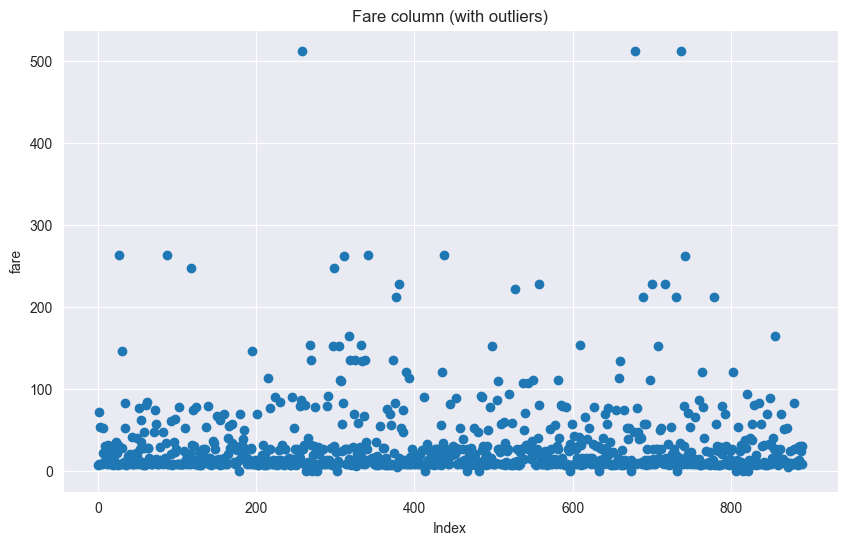

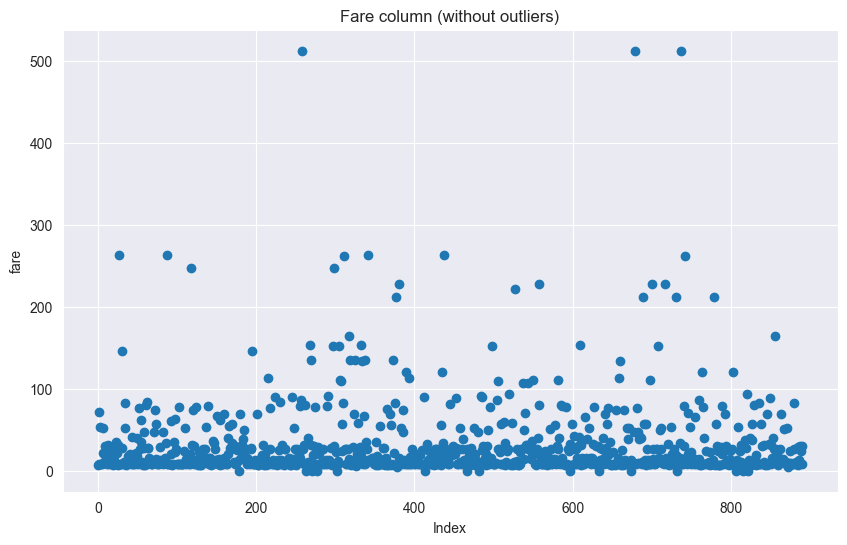

In [73]:
# scatter plot of the fare column
import matplotlib.pyplot as plt
import pandas as pd

def plot_column(df: pd.DataFrame, column_name: str, title: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column_name])
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.title(title)
    plt.show()
    
plot_column(titanic_df, 'fare', 'Fare column (with outliers)')

# restore the original value of the outlier
titanic_df.loc[greatest_fare_index, 'fare'] = previous_highest_fare
plot_column(titanic_df, 'fare', 'Fare column (without outliers)')

In [72]:
print("New mean and median values for the fare column, without outliers:")
print(f"Mean: {titanic_df['fare'].mean():.2f}.")
print(f"Median: {titanic_df['fare'].median():.2f}.")

New mean and median values for the fare column, without outliers:
Mean: 32.20.
Median: 14.45.
